In [388]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json, load_model 
import cv2
import matplotlib.pyplot as plt

In [389]:
json_file = open('model_new.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_new.h5")
print("Loaded model from disk")

Loaded model from disk


In [786]:
type(loaded_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

NoneType

In [760]:
img = cv2.imread('horse-img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

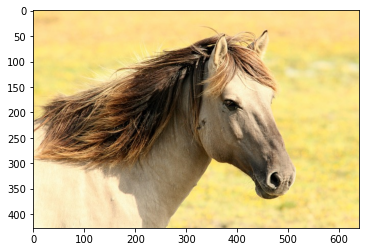

In [761]:
plt.imshow(img/255)

In [762]:
import numpy as np
img = (img/255)

In [763]:
img = tf.image.resize(img,(32,32))

In [764]:
img.shape
new_img = np.expand_dims(img,0)

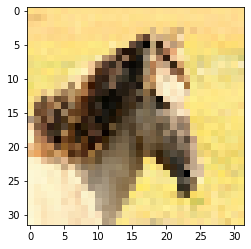

In [783]:
plt.imshow(img)

In [766]:
prediction = loaded_model.predict(new_img)

1/1 [==============================] - 0s 40ms/step


In [767]:
a = np.argmax(prediction)

In [768]:
print(prediction)

[[2.6755155e-08 1.0000000e+00]]


In [769]:
model_cnn = load_model('cifar10_cnn(78t,74).h5')

In [770]:
np.argmax(model_cnn.predict(new_img))

1/1 [==============================] - 0s 169ms/step


7

In [771]:
classes = {0: 'vehicle', 1:'animal'}

In [772]:
classes[a]

'animal'

 # interface of the c10 custom prediction
using the best neural network model to make the prediuction for users images

In [916]:
class Interface:
    def __init__(self):
#         self.img_pth = input("Enter Image name: ")
        self.classes = {0: 'Vehicle', 1:'Animal'}
        self.model = load_model('cnn_95.h5')
        print(self)
    
    def preprocess_image(self, img):
        img = img/255
        img = tf.image.resize(img,(32,32))
        return img
    
#         self.image = np.expand_dims(img,0)
        
    
    def predict(self, img_path=None):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        img = self.preprocess_image(img)
        
        self.image = np.expand_dims(img,0)
        self.predictions = self.model.predict(self.image)
        print("\n")
        
        print('================== Probabilities =====================')
        for i in range(2):
            print(f'Confidence of image being {self.classes[i]:10}: {self.predictions[0][i]}')
        print("\n")
    
        print("====================== Prediction ========================")
        print("The Image is: "+ self.classes[np.argmax(self.predictions)])
        
        
    def __str__(self):
        (self.model.summary())
        
        return """Trained on the cifar10 dataset with the following characteristics
==============================================================
Size of the Train Set: [50000,32,32,3]
Size of the Test Set: [10000,32,32,3]
==============================================================
The Implementation is Such that it Resizes the Image Before Passing it to the Neural Network Architecture.
        """
        
    
        
        

In [917]:
interface = Interface()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [926]:
# print(interface)


import os 

1/1 [==============================] - 0s 39ms/step


================== Probabilities =====================
Confidence of image being Vehicle   : 8.497520077182814e-15
Confidence of image being Animal    : 1.0


====================== Prediction ========================
The Image is: Animal


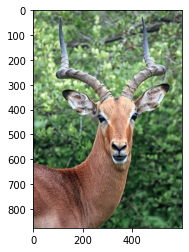

In [934]:
interface.predict("deer.jpg")

In [920]:
interface.predictions[0][0]

2.6755155e-08